[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/AM/blob/main/5_RedesNeurais/RNAs.ipynb)


# Aprendizado de máquina e decisões dirigidas por dados
**Professor: Diogo Ferreira de Lima Silva**

**TPP - UFF**

Exemplos baeados em:
- Geron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow. Third Edition, 2021. https://github.com/ageron/handson-ml3

# Deep Learning

# Multilayer Perceptron (MLP)

Dando prossegumento ao estudo de redes neurais, vamos analisar o uso do Perceptron com várias camadas. Inicialmente, estudaremos um problema de regressão.

### Um problema de Regressão

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

O método MLPRegressor da biblioteca sklearn é uma maneira simples de aplicar um MultiLayer Perceptron. 

Vejamos a aplicação para um conjunto de dados de relacionados a apartamentos, cujo atributo alvo consiste no preço. O conjunto de dados está disponível em sklearn.datasets.

In [2]:
dados = fetch_california_housing()
print(dados.keys())
print(dados.feature_names)
print(dados.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [3]:
X = dados.data
y = dados.target

In [6]:
# imprima os 20 primeiros valores do vetor y
y[:20]

array([4.526, 3.585, 3.521, 3.413, 3.422, 2.697, 2.992, 2.414, 2.267,
       2.611, 2.815, 2.418, 2.135, 1.913, 1.592, 1.4  , 1.525, 1.555,
       1.587, 1.629])

In [9]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Vamos separar os dados em 3 conjuntos: treinamento, validação e teste.

In [10]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42) 

In [20]:
print(f"Shape da matriz de atributos do conjunto total de dados: {X_train_full.shape}\n\
Shape do vetor de rótulos do conjunto total de dados: {y_train_full.shape}\n\
Shape da matriz de atributos do conjunto de treinamento:{X_train.shape}\n\
Shape do vetor de rótulos do conjunto treinamento:{y_train.shape}\n\
Shape da matriz de atributos do conjunto de validação:{X_valid.shape}\n\
Shape do vetor de rótulos do conjunto validação: {y_valid.shape}\n\
Shape da matriz de atributos do conjunto de teste:{X_test.shape}\n\
Shape do vetor de rótulos do conjunto teste: {y_test.shape}")

Shape da matriz de atributos do conjunto total de dados: (15480, 8)
Shape do vetor de rótulos do conjunto total de dados: (15480,)
Shape da matriz de atributos do conjunto de treinamento:(11610, 8)
Shape do vetor de rótulos do conjunto treinamento:(11610,)
Shape da matriz de atributos do conjunto de validação:(3870, 8)
Shape do vetor de rótulos do conjunto validação: (3870,)
Shape da matriz de atributos do conjunto de teste:(5160, 8)
Shape do vetor de rótulos do conjunto teste: (5160,)


O modelo é treinado a seguir:

In [21]:
modelo = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)
pipeline = make_pipeline (StandardScaler(), modelo) # Inclui uma normalização antes da passagem pelas camadas de percepton.
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
erro_rmse = mean_squared_error(y_valid,y_pred,squared=False)

In [22]:
erro_rmse

0.5053326657968639

Apesar de simples, o MLPRegressor do sklearn é limitado.

- Não aceita funções de ativação diferentes;
- suporta apenas o erro do tipo rmse;

Com TensorFlow e Keras, temos muito mais opções!

# Tensorflow + Keras

## Regressão

Vamos solucionar o problema acima usando TensorFlow e Keras

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras import Sequential

In [29]:
tf.keras.backend.clear_session() #limpa a sessão caso tenhamos usado o tensorflow anteriormente no notebook  
tf.random.set_seed(42)

# Criando uma camada de normalização. 
# Passamos como informação da quantidade de atributos
norm = Normalization(input_shape = X_train.shape[1:])

# Agora vamos criar o modelo como uma sequência de camadas.
# Também podemos usar funções de ativação!! Usaremos a relu. Modelaremos uma rede com 3 camadas de 50 nós
M1 = Sequential([norm,
                    Dense(50, activation = "relu"),
                    Dense(50, activation = "relu"),
                    Dense(50, activation = "relu"),
                    Dense(1) # Camada de output
                ])

# Em seguida, devemos compilar o modelo escolhendo a função perda, um otimizador, e métricas que queremos calcular

M1.compile(loss = "mse", # equivalente a tf.keras.losses.mean_squared_error, 
            optimizer = "sgd",  # equivalente a tf.keras.optimizers.SGD(), 
            metrics = ["RootMeanSquaredError"]) # Uma métrica adicional

norm.adapt(X_train) # A camada norm deve adptar-se aos dados de entrada (parâmetros usados para a normalização)

treinamento_historico = M1.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7372 - root_mean_squared_error: 0.8586 - val_loss: 0.8721 - val_root_mean_squared_error: 0.9339
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4029 - root_mean_squared_error: 0.6348 - val_loss: 3.2164 - val_root_mean_squared_error: 1.7934
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4119 - root_mean_squared_error: 0.6418 - val_loss: 1.0569 - val_root_mean_squared_error: 1.0281
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3706 - root_mean_squared_error: 0.6088 - val_loss: 2.4482 - val_root_mean_squared_error: 1.5647
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3569 - root_mean_squared_error: 0.5974 - val_loss: 1.3741 - val_root_mean_squared_error: 1.1722
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3529 - root_mean_squared_error: 0.5940 - val_loss: 0.6612 - val_

In [30]:
historico_df = pd.DataFrame(treinamento_historico.history)
historico_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,0.737247,0.858631,0.872138,0.933883
1,0.402945,0.634779,3.216366,1.793423
2,0.411883,0.641781,1.056915,1.028064
3,0.370585,0.608757,2.448189,1.564669
4,0.356855,0.597374,1.374076,1.172210
5,0.352889,0.594045,0.661241,0.813167
6,0.339670,0.582812,1.234248,1.110967
7,0.337652,0.581079,1.415512,1.189753
8,0.335772,0.579458,0.314727,0.561005
9,0.323821,0.569053,0.332963,0.577030


<AxesSubplot:xlabel='Epochs'>

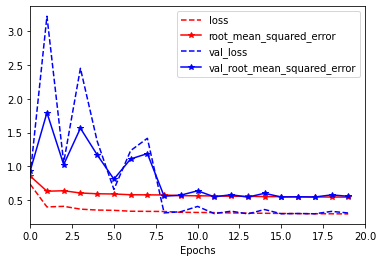

In [31]:
historico_df.plot(style = ["r--", "r-*", "b--", "b-*"],
                    xlim = (0,20), xlabel= "Epochs")

Estudamos a aplicação do tensorflow em um problema de regressão. Vejamos agora como a biblioteca pode ser facilmente usada em um problema de classificação.

## Multiclass classification

Utilizaremos o conjunto de dados "fashion_mnist", que consiste em um problema de classificação de imagens em produtos de vestuário.

In [79]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
import pandas as pd

In [80]:
dados = tf.keras.datasets.fashion_mnist.load_data()
dados

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [81]:
(X_train_full, y_train_full), (X_test, y_test) = dados

In [85]:
print(f'shape da matriz de atributos: {X_train_full.shape}\nshape do vetor de rótulos: {y_train_full.shape}')

shape da matriz de atributos: (60000, 28, 28)
shape do vetor de rótulos: (60000,)


Na célula acima, percebe-se que temos 60000 exemplos de treinamento.

Cada instância está organizada em uma matriz de pixels de dimensão $28\times28$

In [86]:
y_train_full.shape

(60000,)

In [88]:
y_train_full [:30]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4, 3, 0, 2, 4, 4], dtype=uint8)

In [89]:
target_names = ["camiseta/top", "calça", "jaqueta", "vestido", "casaco", 
"chinelo/sandália", "camisa_social", "sapatenis", "bolsa", "bota"] 

In [90]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [91]:
X_train, X_valid, X_test = X_train/255. , X_valid/255. , X_test/255. 

In [92]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

#instanciando o modelo
M = Sequential([
                    Input(shape = [28,28]), # camada de input adicionada
                    Flatten(), # A camada chamada "Flatten" passa cada instância (matrix 28x28) para um vetor de tamanho 784
                    Dense(100, activation = "relu"), # uma camada de 100 neurônios com ativação relu
                    Dense(100, activation = "relu"), # uma camada de 100 neurônios com ativação relu
                    Dense(100, activation = "relu"), # uma camada de 100 neurônios com ativação relu
                    Dense(10, activation = "softmax") # uma camada de output de 10 neurônios com ativação softmax
                ])

In [95]:
M.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Para acessar os parâmetros de uma camada, pode-se usar
params = M.layers[2].get_weights()
params

[array([[ 0.06508744, -0.0053767 ,  0.14930084, ...,  0.07611555,
         -0.13874692,  0.1552178 ],
        [-0.01861176, -0.0567794 , -0.01840453, ..., -0.09566776,
         -0.07273029, -0.1531899 ],
        [ 0.10590735,  0.16531122,  0.09466177, ...,  0.06653714,
         -0.05826545,  0.14592746],
        ...,
        [-0.07933617,  0.08991137,  0.10378638, ...,  0.09451157,
          0.02804798,  0.11183983],
        [ 0.12089685, -0.0364825 ,  0.12472224, ..., -0.13666373,
         -0.00937036, -0.07537369],
        [ 0.02166013, -0.11988169,  0.14094934, ...,  0.09214577,
          0.05492082, -0.13966453]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [72]:
print(f"weights = {params[0]}\n\
-----------------------------\n\
bias = {params[1]}")

weights = [[ 0.06508744 -0.0053767   0.14930084 ...  0.07611555 -0.13874692
   0.1552178 ]
 [-0.01861176 -0.0567794  -0.01840453 ... -0.09566776 -0.07273029
  -0.1531899 ]
 [ 0.10590735  0.16531122  0.09466177 ...  0.06653714 -0.05826545
   0.14592746]
 ...
 [-0.07933617  0.08991137  0.10378638 ...  0.09451157  0.02804798
   0.11183983]
 [ 0.12089685 -0.0364825   0.12472224 ... -0.13666373 -0.00937036
  -0.07537369]
 [ 0.02166013 -0.11988169  0.14094934 ...  0.09214577  0.05492082
  -0.13966453]]
-----------------------------
bias = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


Vamos definir agora a função perda e o otimizador

In [97]:
M.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "sgd",
                metrics = ["accuracy"])

In [98]:
treinamento = M.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
1407/1407 [==============================] - 15s 9ms/step - loss: 0.8356 - accuracy: 0.7206 - val_loss: 0.6862 - val_accuracy: 0.7524
Epoch 2/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5248 - accuracy: 0.8161 - val_loss: 0.6036 - val_accuracy: 0.7925
Epoch 3/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4718 - accuracy: 0.8348 - val_loss: 0.5087 - val_accuracy: 0.8241
Epoch 4/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4374 - accuracy: 0.8462 - val_loss: 0.4775 - val_accuracy: 0.8273
Epoch 5/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4156 - accuracy: 0.8540 - val_loss: 0.5583 - val_accuracy: 0.7972
Epoch 6/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3970 - accuracy: 0.8610 - val_loss: 0.4141 - val_accuracy: 0.8545
Epoch 7/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3819 - accuracy: 0.8656 - val_loss: 0.4367 - val_accuracy

In [99]:
treinamento_historico = pd.DataFrame(treinamento.history)
treinamento_historico.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.302420,0.890000,0.359840,0.869600
16,0.296449,0.893378,0.342524,0.876200
17,0.292015,0.892200,0.331939,0.881333
18,0.284510,0.896956,0.398028,0.860267
19,0.281017,0.897956,0.339904,0.876933


<AxesSubplot: >

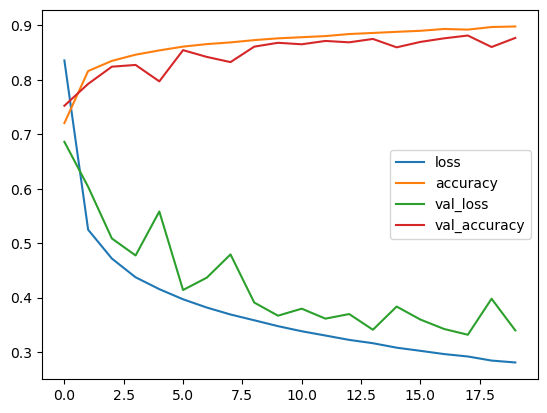

In [100]:
treinamento_historico.plot()

In [101]:
results_test = M.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3661 - accuracy: 0.8655


In [102]:
#print(f'Nossa perda calculada para a "sparse_categorical_crossentropy" foi de {results_test[0]}\n\
print(f'A acurácia no conjunto de teste foi de {results_test[1]}')

A acurácia no conjunto de teste foi de 0.8654999732971191


# Functional API

Também é possível formar estruturas mais complexas no Keras por meio do Functional API. Nesse caso, as camadas são construídas em formato de funções cujos inputs são as camadas anteriores.

In [93]:
from tensorflow.keras.layers import concatenate

In [94]:
dados = fetch_california_housing()
X = dados.data
y = dados.target
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42) 

Digamos que queremos que alguns atributos passem por camadas profundas. Porém, outros não (pode haver interceção nos dois grupos).

- Para isso podemos dividir o dataset

In [95]:
X_train_raso, X_train_profundo = X_train[:, :5], X_train[:, 2:]
X_valid_raso, X_valid_profundo = X_valid[:, :5], X_valid[:, 2:]
X_test_raso, X_test_profundo = X_test[:, :5], X_test[:, 2:]

Criando a estrutura com o Functional API:

In [96]:
tf.keras.backend.clear_session()

input_raso = Input(shape=[5], name="input_raso")
input_profundo = Input(shape = [6], name = "input_profundo")

norm_layer_raso = Normalization()
norm_layer_profundo = Normalization()

norm_raso = norm_layer_raso(input_raso)
norm_profundo = norm_layer_profundo(input_profundo)

hidden1 = Dense(30, activation = "relu")(norm_profundo)
hidden2 = Dense(30, activation ="relu")(hidden1)

concat = concatenate([norm_raso,hidden2])
output = Dense(1)(concat)

modelo = tf.keras.Model(inputs = [input_raso, input_profundo], outputs = [output])

In [97]:
modelo

In [98]:
modelo.compile(loss = "mse",
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics = ["RootMeanSquaredError"])

In [99]:
norm_layer_raso.adapt(X_train_raso)
norm_layer_profundo.adapt(X_train_profundo)

treinamento = modelo.fit({"input_raso": X_train_raso, "input_profundo": X_train_profundo}, # Equivalente a passar um tupple (X_train_raso, X_train_profundo)
                            y_train,
                            epochs = 20,
                            validation_data = ((X_valid_raso,X_valid_profundo), y_valid)
                            )

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1357 - root_mean_squared_error: 1.0657 - val_loss: 0.9314 - val_root_mean_squared_error: 0.9651
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4820 - root_mean_squared_error: 0.6942 - val_loss: 0.8154 - val_root_mean_squared_error: 0.9030
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4285 - root_mean_squared_error: 0.6546 - val_loss: 0.3972 - val_root_mean_squared_error: 0.6303
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4029 - root_mean_squared_error: 0.6348 - val_loss: 0.3728 - val_root_mean_squared_error: 0.6106
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3944 - root_mean_squared_error: 0.6280 - val_loss: 0.4584 - val_root_mean_squared_error: 0.6771
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3838 - root_mean_squared_error: 0.6195 - val_loss: 0.9007 - val_

In [100]:
mse_test, rmse_test = modelo.evaluate((X_test_raso,X_test_profundo), y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3365 - root_mean_squared_error: 0.5801


In [101]:
mse_test

0.3365383446216583